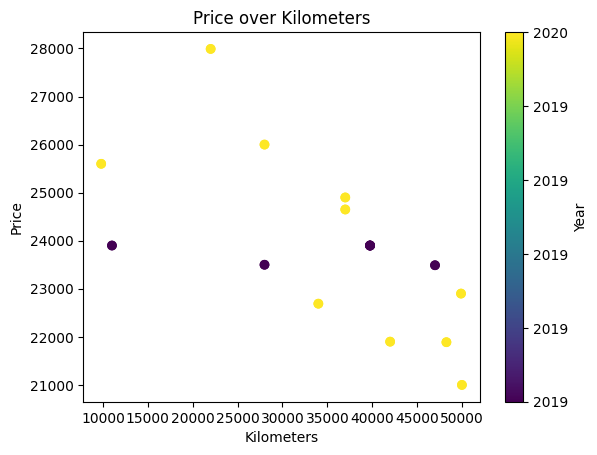

In [7]:
# import interestingcars.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the csv file
df = pd.read_csv('interestingCars.csv', sep = ';')
df

# scatter plot price over km with color of the dots representing the year
plt.scatter(df['km'], df['price'], c=df['year'])
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Price over Kilometers')
# color bar shows the year, not in scientific notation
plt.colorbar(label='Year', format='%d')
plt.show()

#next steps: hashear url para ver cuanto tardan en venderse on average